In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

2023-08-31 08:00:06.675247: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated ASCAT data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/"

In [4]:
with open(data_dir + 'collocated_dict_ascat_gradient_7x7_9000_images_ifs.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,-0.181195,-0.211426,333.339998,2477.183924,1013.350947,1014.568500,6.500048,6.570197,85.631549,84.863134,...,113.699997,68.889999,24.059999,54.570000,43.459999,54.509998,20180405T030600Z,20180405T044758.125000Z,4.360941,1.169768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.078067,-0.018678,310.069994,2491.647426,997.185190,998.412506,4.373226,4.400169,85.412753,84.989054,...,54.549999,100.279999,145.940002,49.439999,38.480000,49.480000,20200121T114500Z,20200121T132358.125000Z,9.761609,-1.152873
6789,0.078067,-0.018678,299.200002,2491.674058,996.891473,998.120007,4.291631,4.320973,85.900303,85.518713,...,52.619999,98.610001,144.559998,55.549999,44.049999,55.289997,20200121T121500Z,20200121T135658.125000Z,9.660257,-1.935741
6790,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
6791,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
0,-0.265854,-0.405009,258.355000,2477.429236,1020.302350,1021.538998,4.277434,4.374553,66.150299,65.122498,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-4.214585,3.935597
1,-0.239654,-0.298918,258.629996,2477.731768,1020.379711,1021.616504,4.113529,4.223896,63.821798,62.581992,...,112.209999,67.379997,22.689999,62.099998,50.959999,61.959999,20180403T030600Z,20180403T044758.125000Z,-3.485326,3.685807
2,-0.060309,-0.164963,337.485001,2477.745677,1016.227102,1017.455994,4.466434,4.565075,65.958899,64.877946,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,0.053796,2.618398
3,-0.196889,-0.216751,338.524998,2477.762501,1015.713488,1016.941504,4.709281,4.788328,69.045948,68.241269,...,-144.699997,-98.750000,-52.799999,57.230000,45.759998,57.119999,20180404T042700Z,20180404T060858.125000Z,1.969399,1.141287
4,-0.181195,-0.211426,333.339998,2477.183924,1013.350947,1014.568500,6.500048,6.570197,85.631549,84.863134,...,113.699997,68.889999,24.059999,54.570000,43.459999,54.509998,20180405T030600Z,20180405T044758.125000Z,4.360941,1.169768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788,0.078067,-0.018678,310.069994,2491.647426,997.185190,998.412506,4.373226,4.400169,85.412753,84.989054,...,54.549999,100.279999,145.940002,49.439999,38.480000,49.480000,20200121T114500Z,20200121T132358.125000Z,9.761609,-1.152873
6789,0.078067,-0.018678,299.200002,2491.674058,996.891473,998.120007,4.291631,4.320973,85.900303,85.518713,...,52.619999,98.610001,144.559998,55.549999,44.049999,55.289997,20200121T121500Z,20200121T135658.125000Z,9.660257,-1.935741
6790,0.078067,-0.018678,286.894995,2491.681647,996.236889,997.464505,4.346215,4.374028,86.797202,86.444072,...,-13.349999,-57.930000,-102.669998,58.980000,47.930000,59.090000,20200121T132400Z,20200121T150558.125000Z,9.854824,-1.954211
6791,0.078067,-0.018678,303.655000,2491.649560,994.401416,995.630505,4.236066,4.264247,89.521652,89.357990,...,105.129997,60.469997,15.740000,52.669998,41.669998,52.629997,20200121T200600Z,20200121T214758.125000Z,7.869203,-2.273894


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,start_sensing_time,stop_sensing_time,u10,v10
4534,-0.032881,-0.066335,354.930002,2477.523802,1010.124221,1011.345984,6.432838,6.461757,92.931653,92.958873,...,104.970001,60.309998,15.460000,51.279999,40.430000,51.439999,20200820T204800Z,20200820T222958.125000Z,-2.642549,7.299494
5884,-0.012150,-0.032903,348.509998,2482.583433,1021.666886,1022.909000,6.068217,6.072566,97.047853,97.260236,...,-13.809999,-58.389999,-102.989998,56.809998,45.770000,56.840000,20210623T140300Z,20210623T154158.125000Z,5.202958,2.503247
3130,-0.096742,-0.256058,339.840001,2483.598756,1025.167843,1026.423999,4.543451,4.578594,84.707887,84.525992,...,-162.129990,-117.559998,-73.000000,57.899998,46.879997,58.020000,20160429T041200Z,20160429T055358.125000Z,10.657385,1.380908
6536,0.078067,-0.018678,294.884998,2485.349514,1021.140943,1022.386508,5.228528,5.256178,88.630352,88.358336,...,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,20191018T122400Z,20191018T140558.125000Z,-4.786852,1.289569
929,0.107764,-0.173369,289.199998,2473.510835,1024.593900,1025.824005,6.092995,6.199298,80.796299,79.978310,...,55.049999,100.529999,145.929993,46.349998,35.719997,46.360001,20170113T140900Z,20170113T154758.125000Z,1.247879,-4.239812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.186782,0.418307,344.035001,2475.432878,1003.980576,1005.183505,7.748592,7.755491,96.237098,96.393674,...,51.689999,97.939995,144.000000,61.419998,49.980000,61.459999,20181128T172700Z,20181128T190558.125000Z,-2.082352,1.240975
2283,0.009946,-0.040725,322.300003,2489.425464,1009.137351,1010.379510,4.343677,4.379457,86.171650,85.833879,...,49.629997,96.139999,142.479996,62.910000,51.419998,62.949997,20170601T120600Z,20170601T134458.125000Z,-4.695946,7.894032
2004,0.009946,-0.040725,280.895001,2487.212276,1022.817826,1024.076505,4.476766,4.494666,89.290650,89.316839,...,53.320000,99.239998,145.089996,54.149998,42.879997,54.189999,20161102T121800Z,20161102T135658.125000Z,3.060370,-6.322997
3668,0.027770,0.144815,343.004994,2486.506486,1003.208213,1004.435010,5.574504,5.574473,98.219436,98.477885,...,-161.319992,-116.739998,-72.180000,56.239998,45.250000,56.340000,20161025T040900Z,20161025T055358.125000Z,6.032160,-8.511133


In [8]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

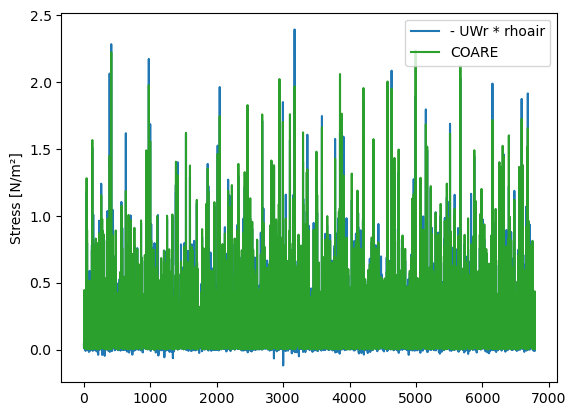

In [9]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

Text(0, 0.5, 'COARE [N/m²]')

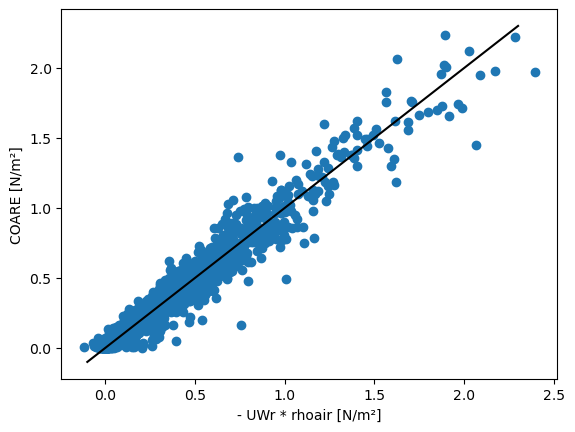

In [10]:
plt.scatter(y.values, c.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [11]:
df = df[( (df['UWr'] >= -2) & (df['UWr'] <= 2) )]               

In [12]:
df.shape

(6793, 70)

In [13]:
df.shape[0]*0.8

5434.400000000001

In [14]:
split_idx = int(df.shape[0]*0.8)
split_idx

5434

# Prepare features and labels

In [15]:
predictor_variables = [
    'sigma0_trip_fore_x', 'sigma0_trip_mid_x', 'sigma0_trip_aft_x',
    'sigma0_trip_fore_y', 'sigma0_trip_mid_y', 'sigma0_trip_aft_y',
    'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
    'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
    'u10', 'v10'
]

In [16]:
x = df[predictor_variables]
x

,sigma0_trip_fore_x,sigma0_trip_mid_x,sigma0_trip_aft_x,sigma0_trip_fore_y,sigma0_trip_mid_y,sigma0_trip_aft_y,azi_angle_trip_fore,azi_angle_trip_mid,azi_angle_trip_aft,inc_angle_trip_fore,inc_angle_trip_mid,inc_angle_trip_aft,u10,v10
4534,7.304869,9.654251,10.609871,2.613363,0.574034,5.043440,104.970001,60.309998,15.460000,51.279999,40.430000,51.439999,-2.642549,7.299494
5884,5.700016,3.446821,4.494957,-1.375412,-0.015146,5.473158,-13.809999,-58.389999,-102.989998,56.809998,45.770000,56.840000,5.202958,2.503247
3130,0.052311,0.091984,0.814751,0.614634,-3.753567,-4.490824,-162.129990,-117.559998,-73.000000,57.899998,46.879997,58.020000,10.657385,1.380908
6536,0.580929,2.388872,3.084324,-2.821222,-0.960644,-1.710934,54.949997,100.769997,146.470001,48.789997,37.829998,48.779999,-4.786852,1.289569
929,4.927242,5.232243,0.187212,3.915337,3.298899,0.609487,55.049999,100.529999,145.929993,46.349998,35.719997,46.360001,1.247879,-4.239812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,13.168431,14.213201,15.519925,5.739441,5.171023,5.494786,51.689999,97.939995,144.000000,61.419998,49.980000,61.459999,-2.082352,1.240975
2283,0.634533,1.316296,1.142449,-1.355215,-0.302595,0.346004,49.629997,96.139999,142.479996,62.910000,51.419998,62.949997,-4.695946,7.894032
2004,3.026850,2.235149,2.134399,1.034605,1.115685,1.192724,53.320000,99.239998,145.089996,54.149998,42.879997,54.189999,3.060370,-6.322997
3668,0.989002,2.697884,6.024920,0.850903,0.876062,-1.900141,-161.319992,-116.739998,-72.180000,56.239998,45.250000,56.340000,6.032160,-8.511133


In [17]:
y = - df['UWr'] * df['rhoair']
y

4534    0.035339
5884    0.009223
3130    0.021835
6536    0.025754
929     0.158060
          ...   
1317    0.175339
2283    0.412265
2004   -0.005228
3668   -0.009562
607     0.005888
Length: 6793, dtype: float64

NaNs: 

2018-12-04 11:10:59.993607         NaN

2018-12-16 23:11:59.981755         NaN

# COARE

In [18]:
c = df['stress']

In [19]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [20]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [21]:
c_train = c[:split_idx]
c_test = c[split_idx:]

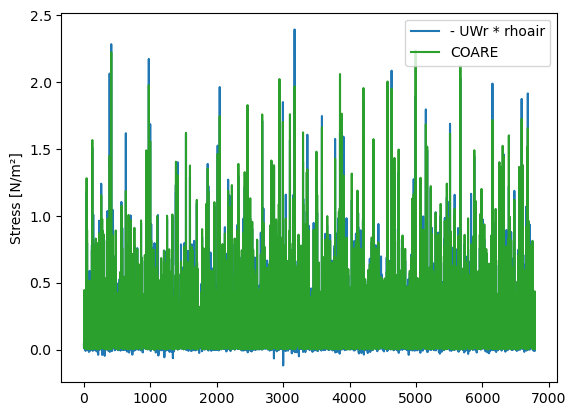

In [22]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [23]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

# ML setup

In [24]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [25]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [26]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500


2023-08-31 08:00:09.985901: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-31 08:00:09.986163: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-31 08:00:09.986174: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-31 08:00:09.986194: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-hw8rl83-bn-compute): /proc/driver/nvidia/version does not exist
2023-08-31 08:00:09.986421: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

119/119 [==============================] - 1s 4ms/step - loss: 2.2473 - mean_absolute_error: 0.9608 - val_loss: 1.7548 - val_mean_absolute_error: 0.8173
Epoch 2/500
119/119 [==============================] - 0s 766us/step - loss: 5.2318 - mean_absolute_error: 0.9042 - val_loss: 1.5738 - val_mean_absolute_error: 0.7286
Epoch 3/500
119/119 [==============================] - 0s 744us/step - loss: 1.5642 - mean_absolute_error: 0.7369 - val_loss: 1.4948 - val_mean_absolute_error: 0.6853
Epoch 4/500
119/119 [==============================] - 0s 733us/step - loss: 1.7406 - mean_absolute_error: 0.6897 - val_loss: 1.4507 - val_mean_absolute_error: 0.6618
Epoch 5/500
119/119 [==============================] - 0s 716us/step - loss: 2.1767 - mean_absolute_error: 0.6712 - val_loss: 1.4223 - val_mean_absolute_error: 0.6481
Epoch 6/500
119/119 [==============================] - 0s 726us/step - loss: 2.6967 - mean_absolute_error: 0.6898 - val_loss: 1.3986 - val_mean_absolute_error: 0.6393
Epoch 7/500


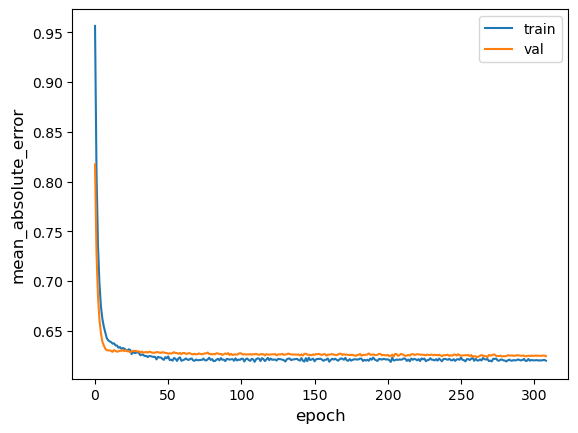

43/43 [==============================] - 0s 371us/step - loss: 1.0404 - mean_absolute_error: 0.6338
Test accuracy 0.6337846517562866
Test loss 1.040433645248413


In [27]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [28]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [29]:
np.mean(y_test)

0.18177995781282819

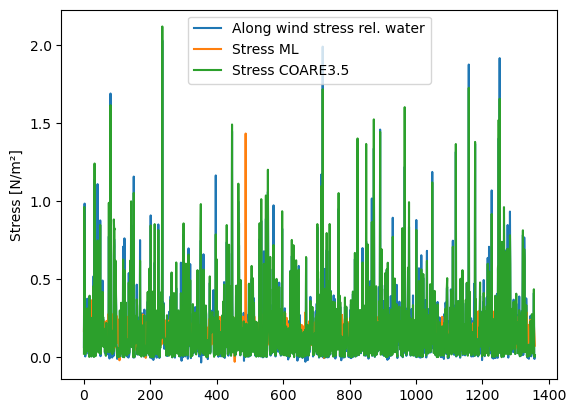

In [30]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

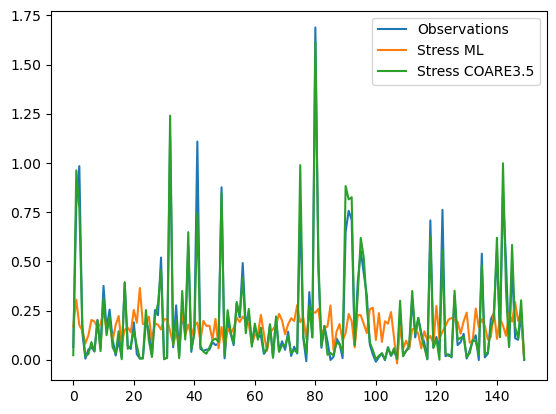

In [31]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

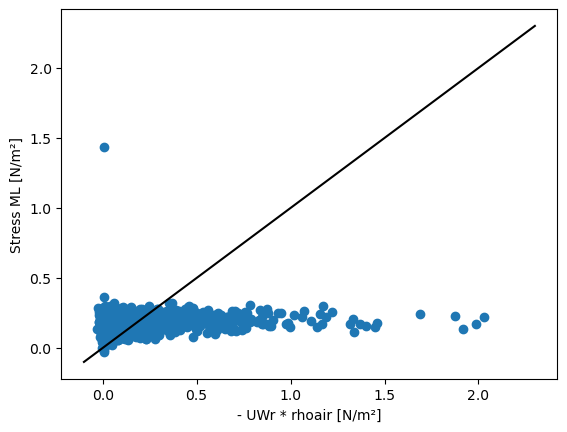

In [32]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

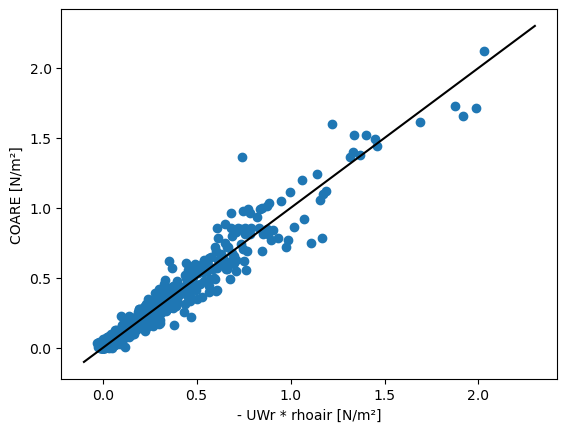

In [33]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

In [34]:
rmse(y_test.values, y_test_pred)

0.2528471340471025

In [35]:
rmse(y_test.values, c_test)

0.052943497414423904

## Correlation

In [36]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.19061438],
       [0.19061438, 1.        ]])

In [37]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

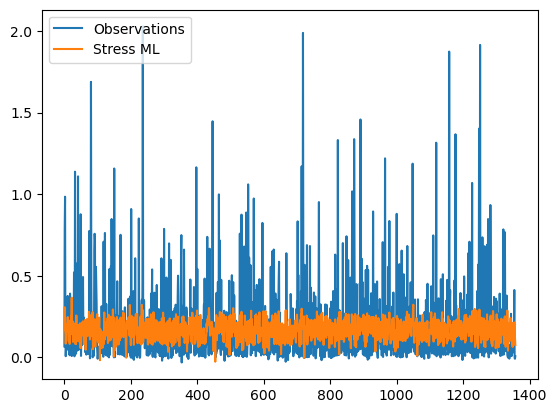

In [38]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [39]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.23132217],
       [0.23132217, 1.        ]])

In [40]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97659041],
       [0.97659041, 1.        ]])

In [41]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.25061298619418415

## Correlation

In [42]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.19061438],
       [0.19061438, 1.        ]])

In [43]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

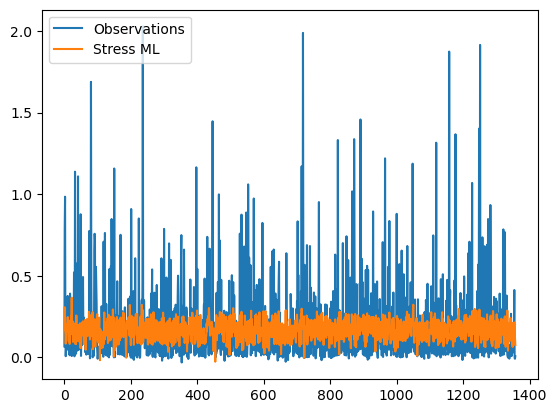

In [44]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [45]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.23132217],
       [0.23132217, 1.        ]])

In [46]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97659041],
       [0.97659041, 1.        ]])

In [47]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.25061298619418415

# Other experiments

In [48]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [49]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [50]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(126, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
119/119 [==============================] - 1s 2ms/step - loss: 2.1985 - mean_absolute_error: 1.0905 - val_loss: 0.9817 - val_mean_absolute_error: 0.6230
Epoch 2/500
119/119 [==============================] - 0s 1ms/step - loss: 1.2575 - mean_absolute_error: 0.7964 - val_loss: 0.9621 - val_mean_absolute_error: 0.6248
Epoch 3/500
119/119 [==============================] - 0s 1ms/step - loss: 1.3471 - mean_absolute_error: 0.7913 - val_loss: 0.9970 - val_mean_absolute_error: 0.6323
Epoch 4/500
119/119 [==============================] - 0s 1ms/step - loss: 1.1967 - mean_absolute_error: 0.7345 - val_loss: 0.9809 - val_mean_absolute_error: 0.6227
Epoch 5/500
119/119 [==============================] - 0s 1ms/step - loss: 0.9976 - mean_absolute_error: 0.6999 - val_loss: 0.9458 - val_mean_absolute_error: 0.6166
Epoch 6/500
119/119 [==============================] - 0s 1ms/step - loss: 1.0269 - mean_absolute_error: 0.6802 - val_loss: 0.9300 - val_mean_absolute_error: 0.6221
Epoch 7/50

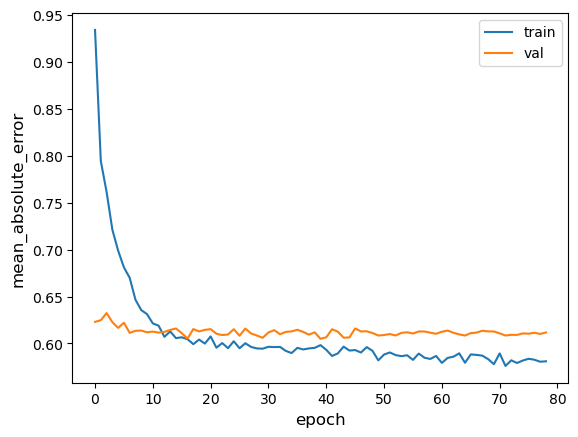

43/43 [==============================] - 0s 401us/step - loss: 1.1704 - mean_absolute_error: 0.6395
Test accuracy 0.6394689679145813
Test loss 1.170440673828125


In [51]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [52]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [53]:
rmse(y_test.values, y_test_pred)

0.2724503206834005

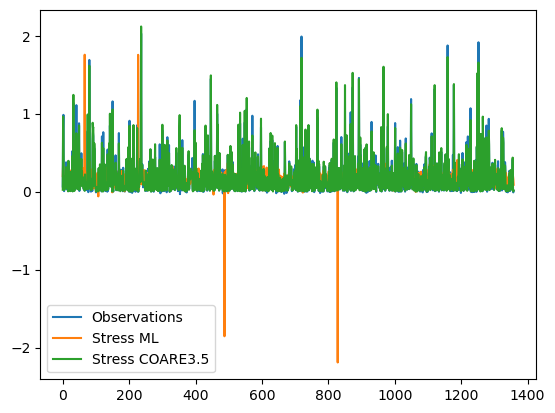

In [54]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

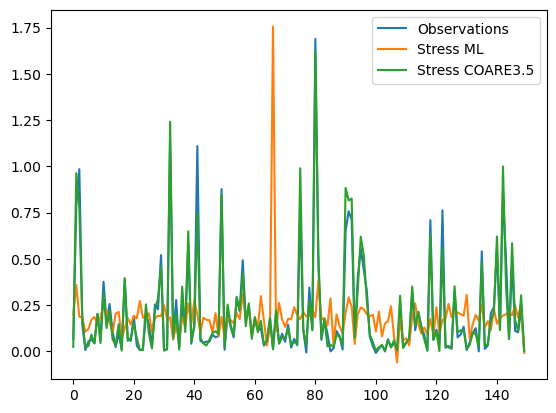

In [55]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

Text(0, 0.5, 'Stress ML [N/m²]')

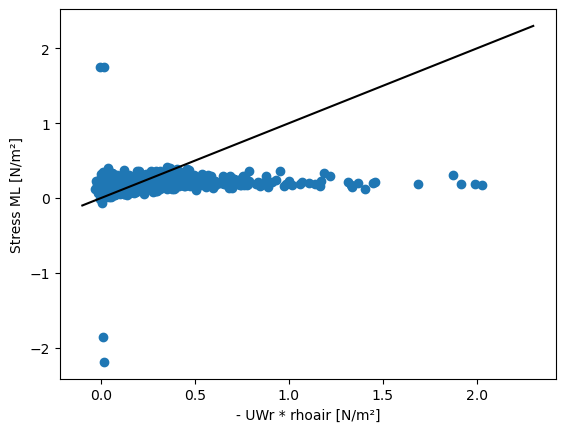

In [56]:
plt.scatter(y_test, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [57]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.15853076],
       [0.15853076, 1.        ]])

In [58]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

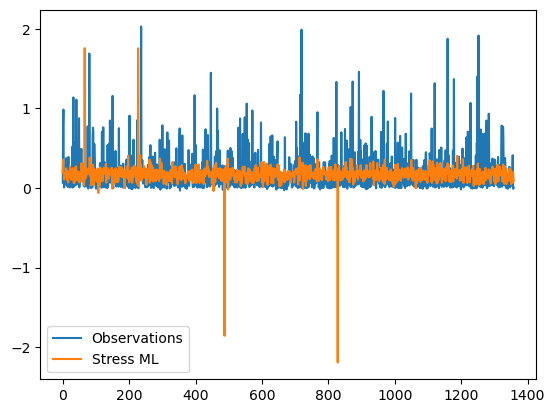

In [59]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [60]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2.5], c_test.values[y_test_pred[:, 0] < 2.5])

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

In [61]:
rmse(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])

0.2724503206834005

Text(0, 0.5, 'Stress ML [N/m²]')

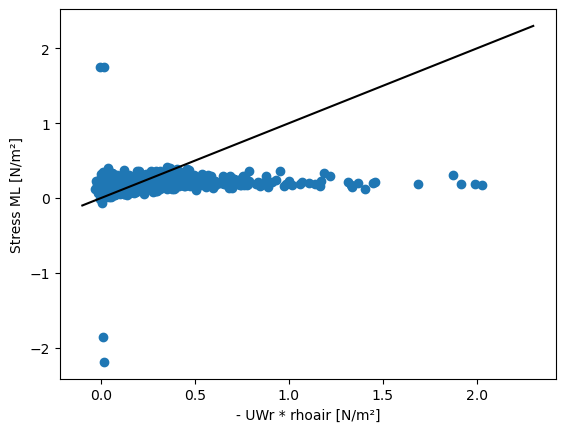

In [62]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2.5], y_test_pred[y_test_pred[:, 0] < 2.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

## Correlation

In [63]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.15853076],
       [0.15853076, 1.        ]])

In [64]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

In [65]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [66]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [67]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
119/119 [==============================] - 1s 5ms/step - loss: 3.5717 - mean_absolute_error: 1.3841 - val_loss: 0.9735 - val_mean_absolute_error: 0.6376
Epoch 2/500
119/119 [==============================] - 1s 4ms/step - loss: 1.4407 - mean_absolute_error: 0.8642 - val_loss: 0.9515 - val_mean_absolute_error: 0.6595
Epoch 3/500
119/119 [==============================] - 0s 4ms/step - loss: 1.2470 - mean_absolute_error: 0.7694 - val_loss: 0.9536 - val_mean_absolute_error: 0.6019
Epoch 4/500
119/119 [==============================] - 0s 4ms/step - loss: 0.9991 - mean_absolute_error: 0.7107 - val_loss: 1.0995 - val_mean_absolute_error: 0.6354
Epoch 5/500
119/119 [==============================] - 0s 4ms/step - loss: 1.0505 - mean_absolute_error: 0.6967 - val_loss: 0.9049 - val_mean_absolute_error: 0.6022
Epoch 6/500
119/119 [==============================] - 1s 4ms/step - loss: 1.0597 - mean_absolute_error: 0.6862 - val_loss: 0.9296 - val_mean_absolute_error: 0.6052
Epoch 7/50

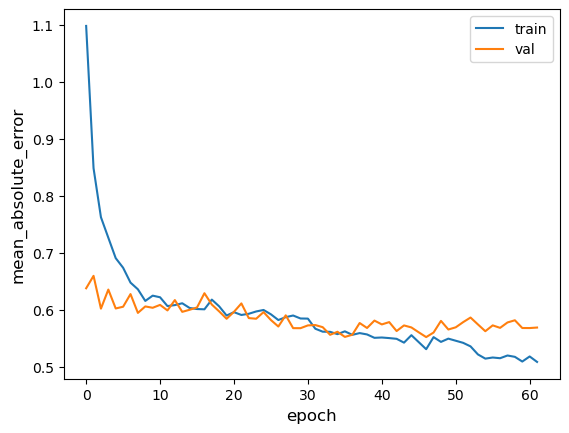

43/43 [==============================] - 0s 749us/step - loss: 1.4529 - mean_absolute_error: 0.6169
Test accuracy 0.6168857216835022
Test loss 1.4528918266296387


In [68]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [69]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [70]:
rmse(y_test.values, y_test_pred)

0.2903753992955505

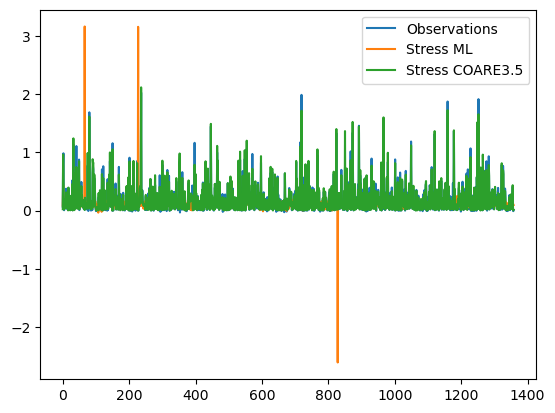

In [71]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

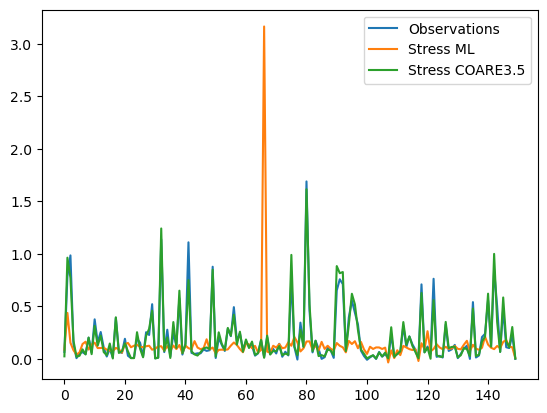

In [72]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [73]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.05603526],
       [0.05603526, 1.        ]])

In [74]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

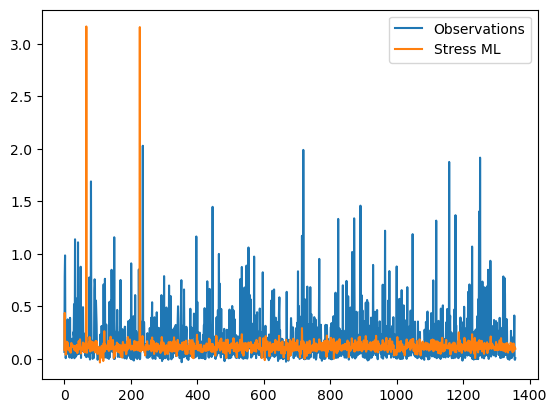

In [75]:
plt.plot(y_test.values[y_test_pred[:, 0] > -1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -1], label='Stress ML')
plt.legend()

In [76]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -1], c_test.values[y_test_pred[:, 0] > -1])

array([[1.        , 0.97659133],
       [0.97659133, 1.        ]])

In [77]:
rmse(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])

0.2804179419355768

Text(0, 0.5, 'Stress ML [N/m²]')

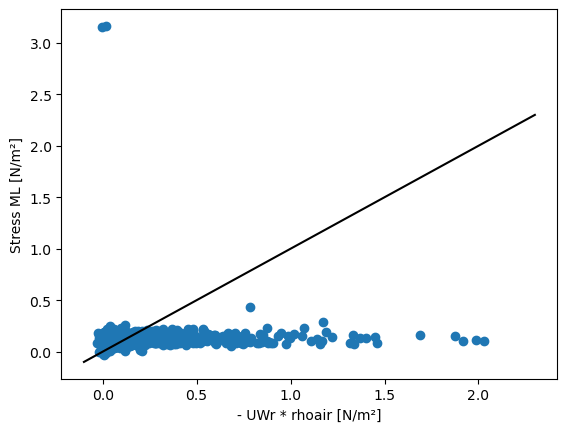

In [78]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -1], y_test_pred[y_test_pred[:, 0] > -1])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [79]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [80]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [81]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
119/119 [==============================] - 2s 13ms/step - loss: 4.7881 - mean_absolute_error: 1.4763 - val_loss: 1.0414 - val_mean_absolute_error: 0.6057
Epoch 2/500
119/119 [==============================] - 1s 12ms/step - loss: 1.5179 - mean_absolute_error: 0.8961 - val_loss: 1.0313 - val_mean_absolute_error: 0.5957
Epoch 3/500
119/119 [==============================] - 1s 12ms/step - loss: 1.2973 - mean_absolute_error: 0.7987 - val_loss: 1.0306 - val_mean_absolute_error: 0.5935
Epoch 4/500
119/119 [==============================] - 2s 13ms/step - loss: 1.2509 - mean_absolute_error: 0.7882 - val_loss: 0.9484 - val_mean_absolute_error: 0.5919
Epoch 5/500
119/119 [==============================] - 1s 12ms/step - loss: 1.2080 - mean_absolute_error: 0.7502 - val_loss: 0.9029 - val_mean_absolute_error: 0.5791
Epoch 6/500
119/119 [==============================] - 1s 11ms/step - loss: 1.0528 - mean_absolute_error: 0.6881 - val_loss: 0.9205 - val_mean_absolute_error: 0.5909
Epoc

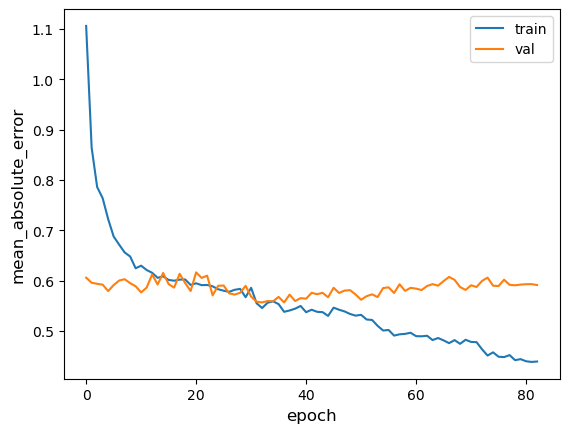

43/43 [==============================] - 0s 2ms/step - loss: 1.8891 - mean_absolute_error: 0.6578
Test accuracy 0.6577556133270264
Test loss 1.889051079750061


In [82]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [83]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [84]:
rmse(y_test.values, y_test_pred)

0.32183505036336124

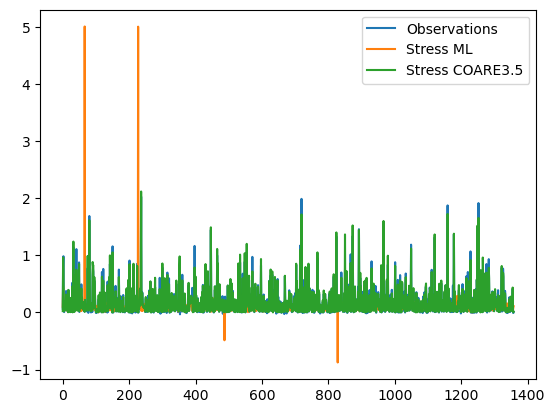

In [85]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

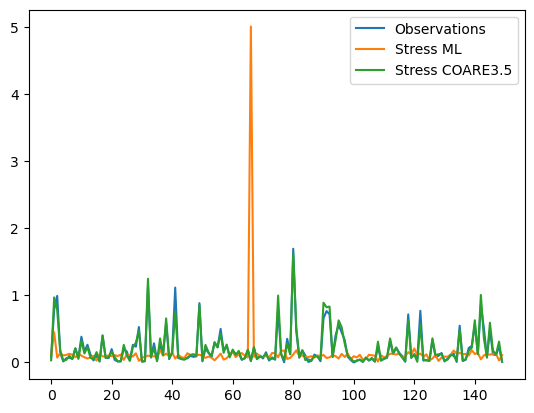

In [86]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [87]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.01020111],
       [-0.01020111,  1.        ]])

In [88]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

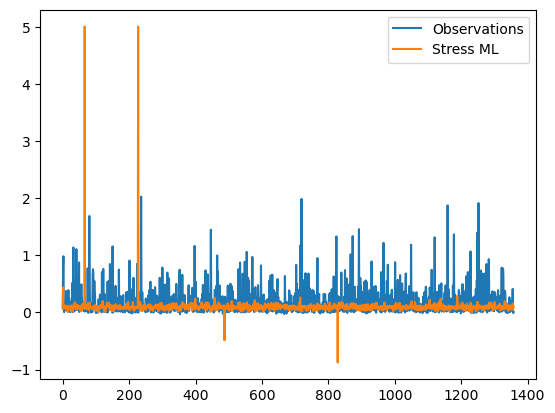

In [89]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [90]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

In [91]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32183505036336124

Text(0, 0.5, 'Stress ML [N/m²]')

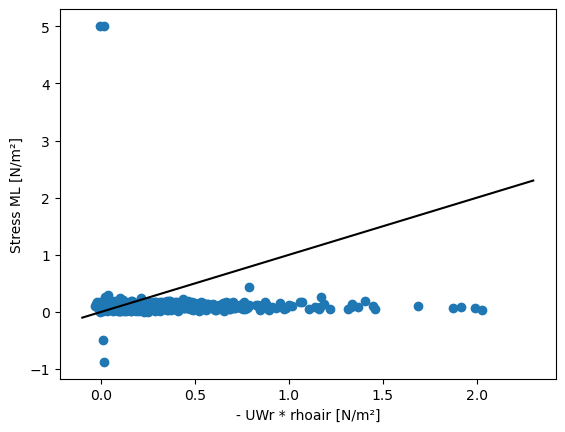

In [92]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

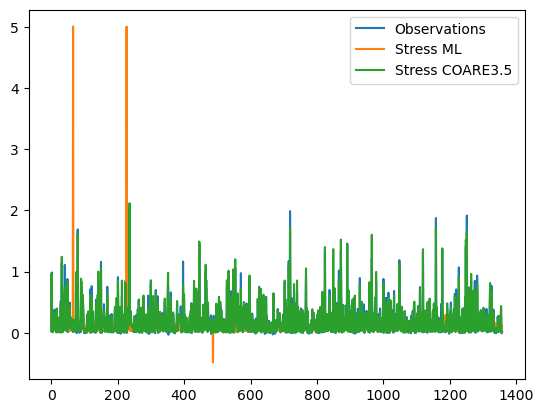

In [93]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -0.5], label='Stress COARE3.5')
plt.legend()

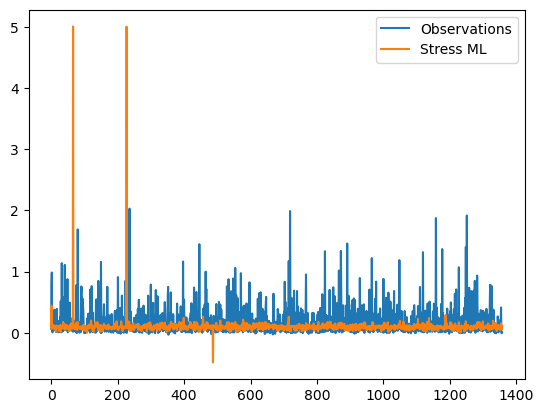

In [94]:
plt.plot(y_test.values[y_test_pred[:, 0] > -0.5], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -0.5], label='Stress ML')
plt.legend()

In [95]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5, 0])

array([[ 1.        , -0.01285681],
       [-0.01285681,  1.        ]])

In [96]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -0.5], c_test.values[y_test_pred[:, 0] > -0.5])

array([[1.        , 0.97659133],
       [0.97659133, 1.        ]])

In [97]:
rmse(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])

0.3206716138456256

Text(0, 0.5, 'Stress ML [N/m²]')

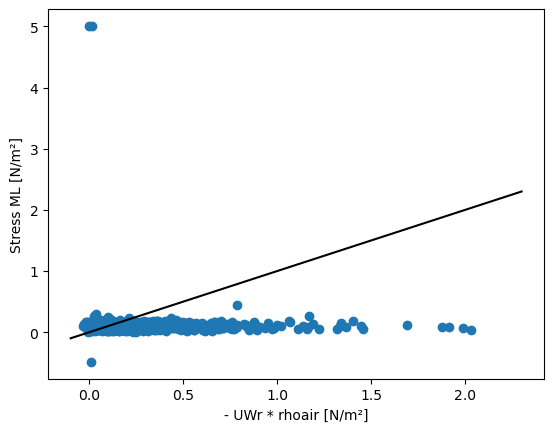

In [98]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -0.5], y_test_pred[y_test_pred[:, 0] > -0.5])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [99]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [100]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [101]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
8/8 [==============================] - 1s 48ms/step - loss: 8.4452 - mean_absolute_error: 2.1376 - val_loss: 0.9871 - val_mean_absolute_error: 0.6452
Epoch 2/500
8/8 [==============================] - 0s 30ms/step - loss: 2.4842 - mean_absolute_error: 1.1962 - val_loss: 1.0160 - val_mean_absolute_error: 0.6772
Epoch 3/500
8/8 [==============================] - 0s 30ms/step - loss: 1.9305 - mean_absolute_error: 0.9972 - val_loss: 1.0188 - val_mean_absolute_error: 0.7072
Epoch 4/500
8/8 [==============================] - 0s 30ms/step - loss: 1.5846 - mean_absolute_error: 0.9083 - val_loss: 1.0729 - val_mean_absolute_error: 0.7699
Epoch 5/500
8/8 [==============================] - 0s 31ms/step - loss: 1.3919 - mean_absolute_error: 0.8382 - val_loss: 1.0811 - val_mean_absolute_error: 0.7924
Epoch 6/500
8/8 [==============================] - 0s 31ms/step - loss: 1.4073 - mean_absolute_error: 0.8163 - val_loss: 0.9945 - val_mean_absolute_error: 0.7010
Epoch 7/500
8/8 [===========

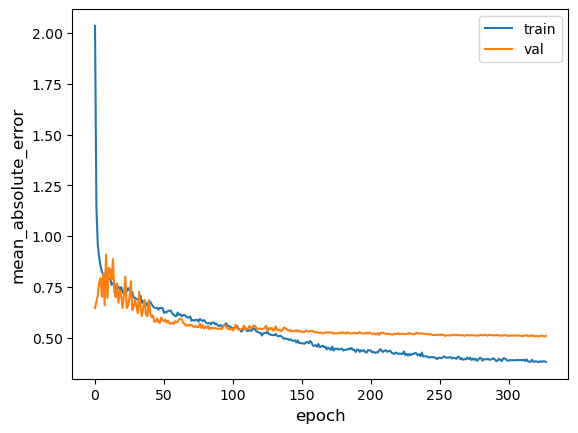

43/43 [==============================] - 0s 2ms/step - loss: 0.8524 - mean_absolute_error: 0.5157
Test accuracy 0.515716552734375
Test loss 0.8523891568183899


In [102]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [103]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [104]:
rmse(y_test.values, y_test_pred)

0.26944200067224267

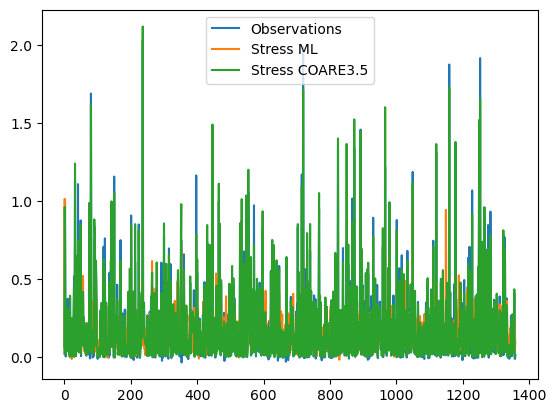

In [105]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

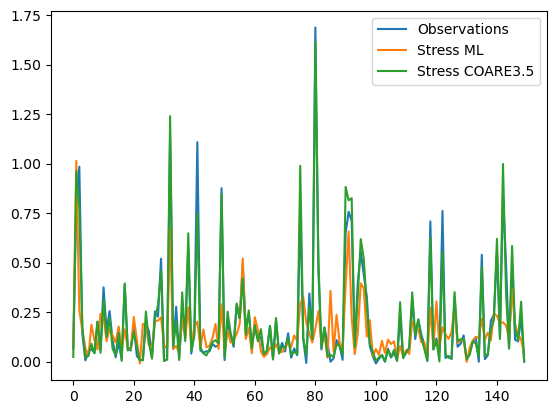

In [106]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [107]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.48212117],
       [0.48212117, 1.        ]])

In [108]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

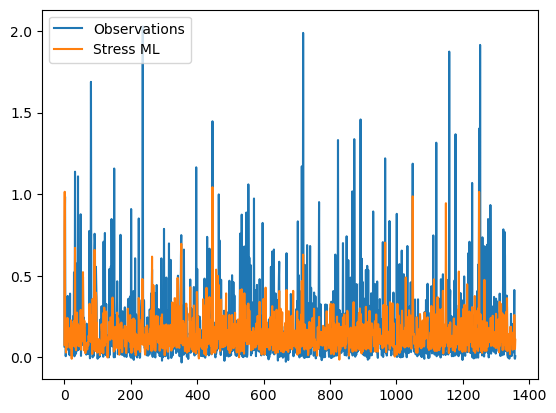

In [109]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [110]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

In [111]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.26944200067224267

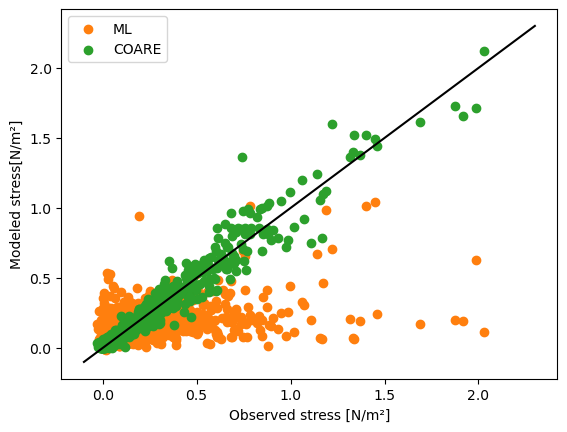

In [112]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

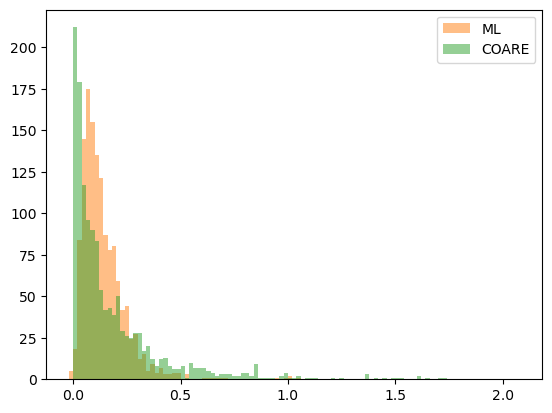

In [113]:
plt.hist(y_test_pred[y_test_pred[:, 0] > -2], label='ML', color='C1', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02)  )
plt.hist(c_test.values[y_test_pred[:, 0] > -2], label='COARE', color='C2', alpha=0.5, bins=np.arange(-0.02, 2.1, 0.02) )
plt.legend()

# Best model

In [114]:
OUT_STEPS = 1
num_features = 1
batch_size =512
epochs=500

metric = 'mean_absolute_error'

In [115]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [116]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
8/8 [==============================] - 1s 48ms/step - loss: 19.3372 - mean_absolute_error: 2.7847 - val_loss: 0.9646 - val_mean_absolute_error: 0.6387
Epoch 2/500
8/8 [==============================] - 0s 32ms/step - loss: 2.9100 - mean_absolute_error: 1.2518 - val_loss: 1.0215 - val_mean_absolute_error: 0.7124
Epoch 3/500
8/8 [==============================] - 0s 31ms/step - loss: 2.0408 - mean_absolute_error: 1.0181 - val_loss: 1.0362 - val_mean_absolute_error: 0.7299
Epoch 4/500
8/8 [==============================] - 0s 31ms/step - loss: 1.8835 - mean_absolute_error: 0.9148 - val_loss: 1.0284 - val_mean_absolute_error: 0.7399
Epoch 5/500
8/8 [==============================] - 0s 32ms/step - loss: 1.6129 - mean_absolute_error: 0.9084 - val_loss: 0.9880 - val_mean_absolute_error: 0.6838
Epoch 6/500
8/8 [==============================] - 0s 32ms/step - loss: 1.7845 - mean_absolute_error: 0.8573 - val_loss: 1.0605 - val_mean_absolute_error: 0.7626
Epoch 7/500
8/8 [==========

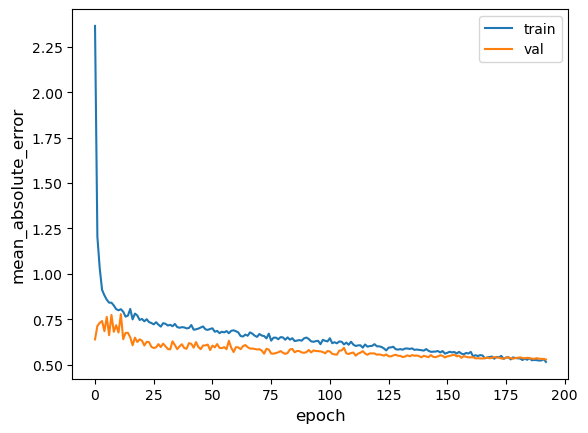

43/43 [==============================] - 0s 2ms/step - loss: 0.9290 - mean_absolute_error: 0.5381
Test accuracy 0.5380914807319641
Test loss 0.9290100336074829


In [117]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [118]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [119]:
rmse(y_test.values, y_test_pred)

0.26824022276402926

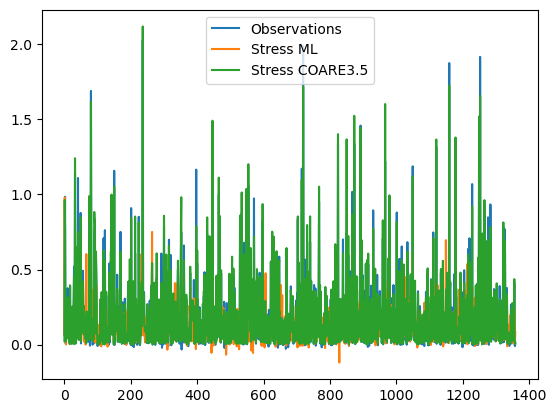

In [120]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

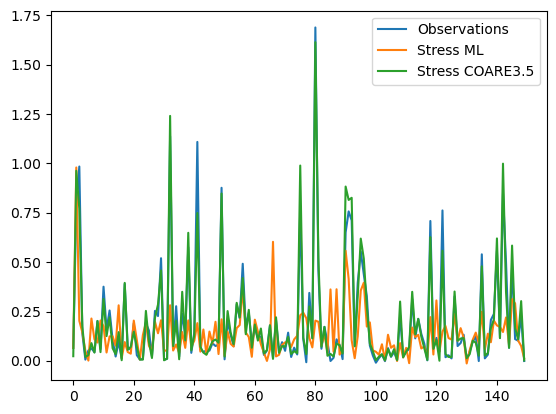

In [121]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [122]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.42538111],
       [0.42538111, 1.        ]])

In [123]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

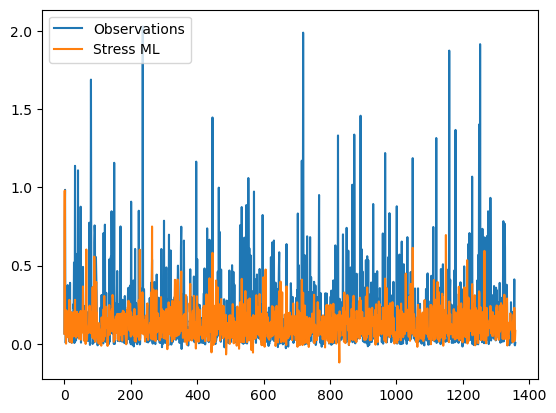

In [124]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [125]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

In [126]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.26824022276402926

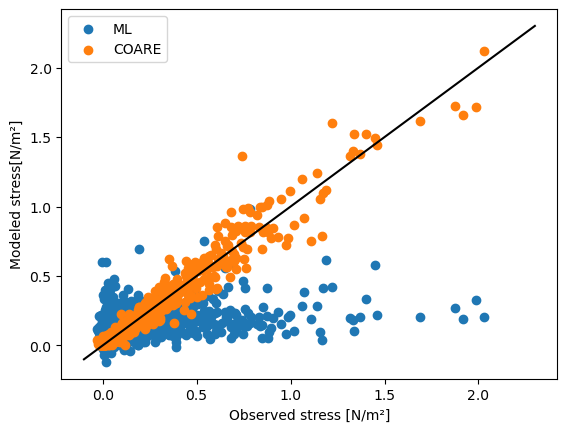

In [127]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2], label='ML')
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2], label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

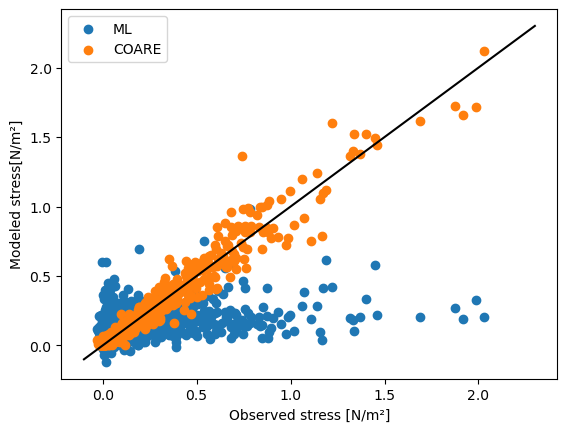

In [128]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [129]:
OUT_STEPS = 1
num_features = 1
batch_size =1024
epochs=500

metric = 'mean_absolute_error'

In [130]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [131]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 1s 164ms/step - loss: 14.2299 - mean_absolute_error: 2.4245 - val_loss: 1.0216 - val_mean_absolute_error: 0.7045
Epoch 2/500
4/4 [==============================] - 0s 123ms/step - loss: 4.3965 - mean_absolute_error: 1.4790 - val_loss: 1.0232 - val_mean_absolute_error: 0.6189
Epoch 3/500
4/4 [==============================] - 0s 123ms/step - loss: 2.5488 - mean_absolute_error: 1.1540 - val_loss: 1.0142 - val_mean_absolute_error: 0.6618
Epoch 4/500
4/4 [==============================] - 0s 121ms/step - loss: 2.4207 - mean_absolute_error: 1.0254 - val_loss: 0.9915 - val_mean_absolute_error: 0.6442
Epoch 5/500
4/4 [==============================] - 1s 134ms/step - loss: 1.8843 - mean_absolute_error: 0.9985 - val_loss: 1.0544 - val_mean_absolute_error: 0.6665
Epoch 6/500
4/4 [==============================] - 0s 118ms/step - loss: 1.7213 - mean_absolute_error: 0.9070 - val_loss: 0.9482 - val_mean_absolute_error: 0.6319
Epoch 7/500
4/4 [====

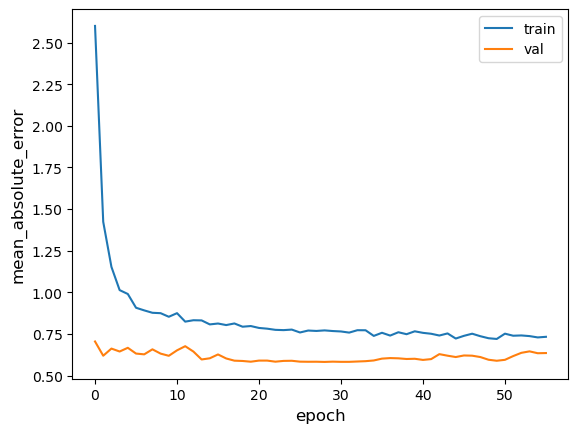

43/43 [==============================] - 0s 7ms/step - loss: 1.4391 - mean_absolute_error: 0.6729
Test accuracy 0.6729085445404053
Test loss 1.4391493797302246


In [132]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [133]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [134]:
rmse(y_test.values, y_test_pred)

0.28485749049478254

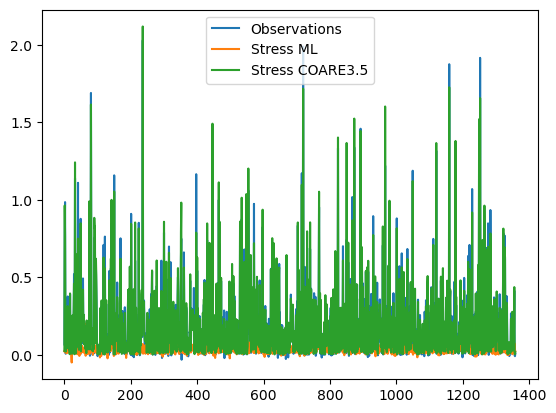

In [135]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

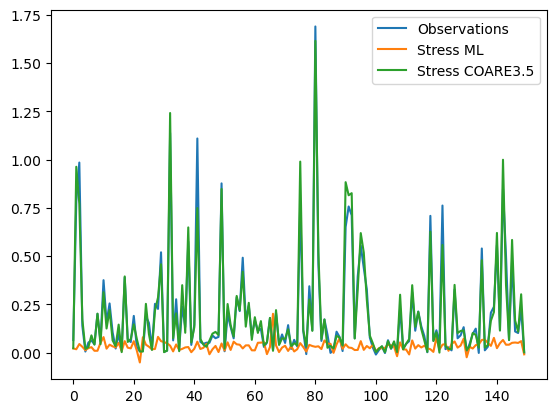

In [136]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [137]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.13687661],
       [0.13687661, 1.        ]])

In [138]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

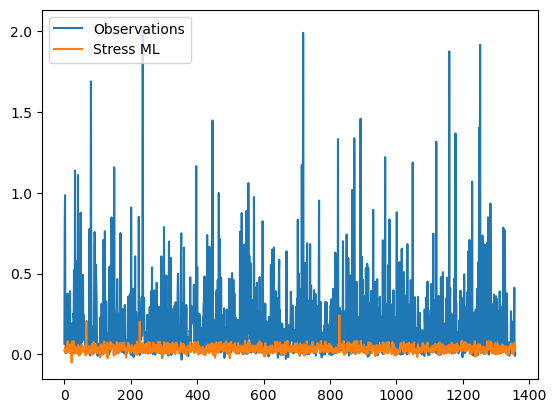

In [139]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [140]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

In [141]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.28485749049478254

Text(0, 0.5, 'Stress ML [N/m²]')

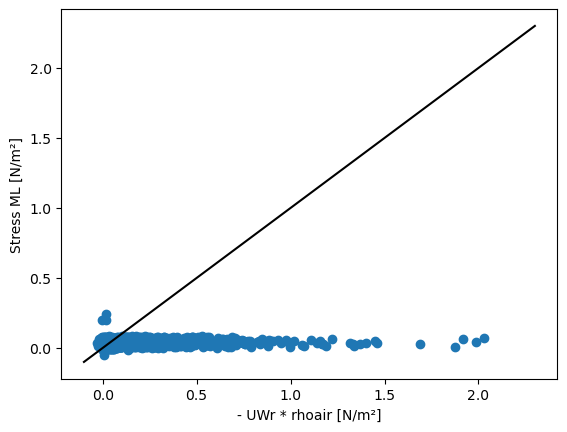

In [142]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

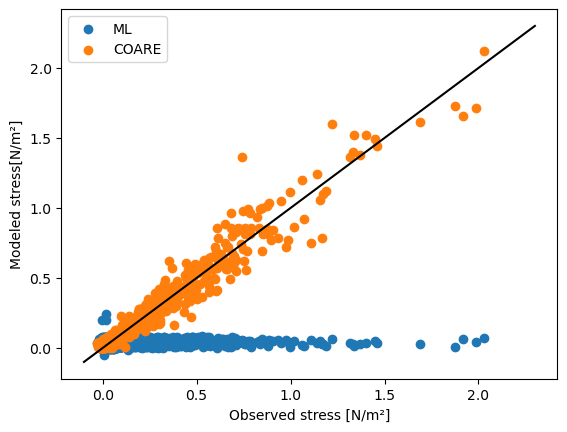

In [143]:
plt.scatter(y_test.values, y_test_pred, label='ML')
plt.scatter(y_test.values, c_test.values, label='COARE')
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('Observed stress [N/m²]') 
plt.ylabel('Modeled stress[N/m²]') 
plt.legend()

In [144]:
OUT_STEPS = 1
num_features = 1
batch_size =2048
epochs=1000

metric = 'mean_absolute_error'

In [145]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [146]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8192, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/1000
2/2 [==============================] - 2s 684ms/step - loss: 12.0227 - mean_absolute_error: 2.2624 - val_loss: 1.2479 - val_mean_absolute_error: 0.7061
Epoch 2/1000
2/2 [==============================] - 1s 540ms/step - loss: 17.5537 - mean_absolute_error: 3.3808 - val_loss: 1.0671 - val_mean_absolute_error: 0.7171
Epoch 3/1000
2/2 [==============================] - 1s 557ms/step - loss: 3.3162 - mean_absolute_error: 1.3720 - val_loss: 1.0686 - val_mean_absolute_error: 0.7071
Epoch 4/1000
2/2 [==============================] - 1s 645ms/step - loss: 2.9446 - mean_absolute_error: 1.2557 - val_loss: 1.0634 - val_mean_absolute_error: 0.6757
Epoch 5/1000
2/2 [==============================] - 1s 544ms/step - loss: 2.0737 - mean_absolute_error: 0.9668 - val_loss: 1.3820 - val_mean_absolute_error: 0.8043
Epoch 6/1000
2/2 [==============================] - 1s 557ms/step - loss: 2.2143 - mean_absolute_error: 1.0606 - val_loss: 1.2875 - val_mean_absolute_error: 0.7571
Epoch 7/1000
2

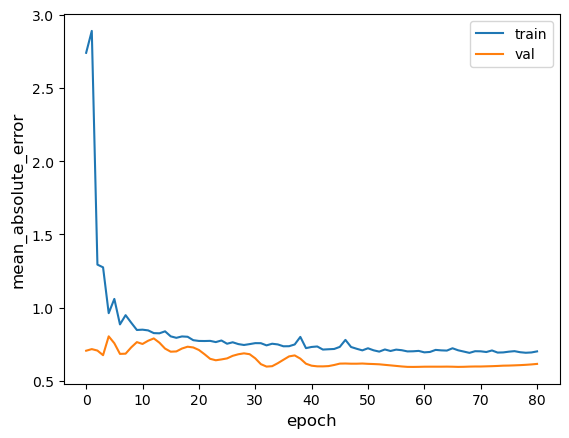

43/43 [==============================] - 1s 25ms/step - loss: 1.3301 - mean_absolute_error: 0.6449
Test accuracy 0.6449306011199951
Test loss 1.3300670385360718


In [147]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [148]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [149]:
rmse(y_test.values, y_test_pred)

0.273401586472529

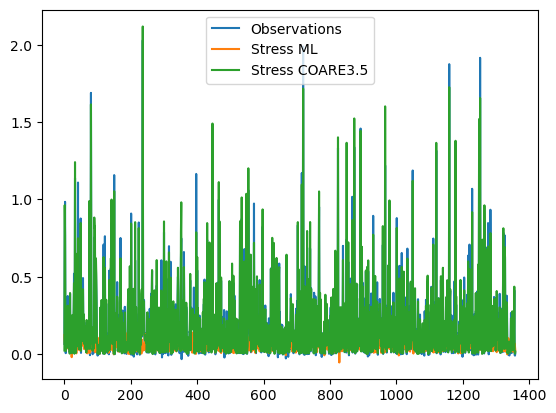

In [150]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

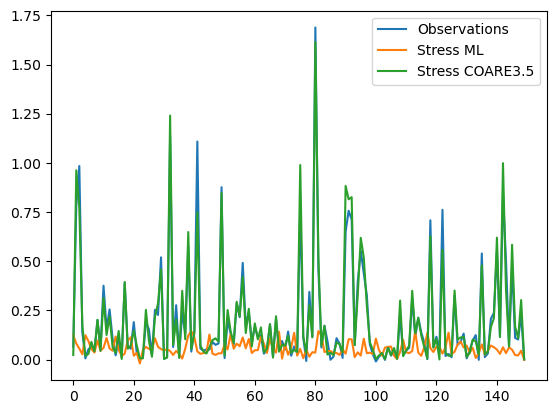

In [151]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

## Correlation

In [152]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.06445885],
       [0.06445885, 1.        ]])

In [153]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

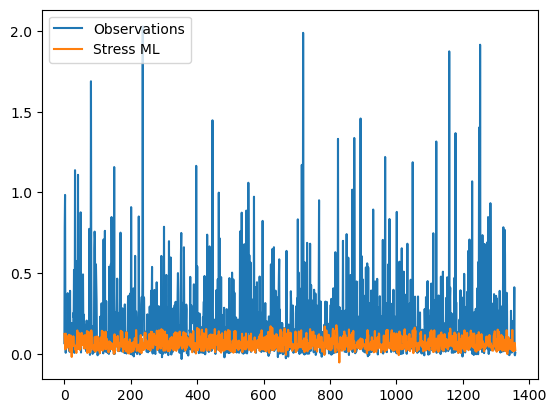

In [154]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [155]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97659938],
       [0.97659938, 1.        ]])

In [156]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.273401586472529

Text(0, 0.5, 'Stress ML [N/m²]')

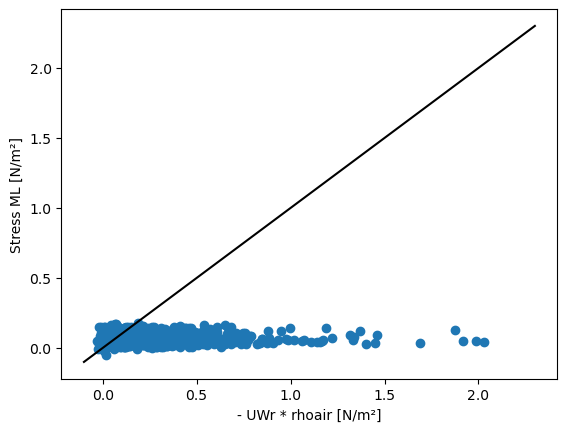

In [157]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 